# Xopt basic example

An Xopt problem can be described by a simple YAML file. Here we will demonstrate how this is used to optimize a well-known constrained multi-objective test function, TNK.

## TNK test function

The TNK function is defined with:

$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [13]:
# Import the class
from xopt import Xopt

In [14]:
!mkdir temp

A subdirectory or file temp already exists.


The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [21]:
# Make a proper input file. 
YAML="""
xopt: {}
generator:
    name: Random
    options: {}

evaluator:
    name: test_TNK
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE, y2: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    linked_variables: {x9: x1}
    constants: {a: dummy_constant}

"""

In [22]:
# create Xopt object
X = Xopt()
X.from_yaml(YAML)


# Run Random data generation

In [25]:
# Take one step (generate a single point)
X.step()

In [26]:
# examine the results
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
0,2.328356,2.358046,dummy_constant,2.328356,2.328356,2.358046,9.882136,6.795221,"[1, 2, 3]",False,


In [27]:
# take a couple of steps and examine the results
for _ in range(10):
    X.step()
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
0,2.328356,2.358046,dummy_constant,2.328356,2.328356,2.358046,9.882136,6.795221,"[1, 2, 3]",False,
1,2.618200,0.806011,dummy_constant,2.618200,2.618200,0.806011,6.498044,4.580416,"[1, 2, 3]",False,
2,2.869312,1.902085,dummy_constant,2.869312,2.869312,1.902085,10.950707,7.579481,"[1, 2, 3]",False,
3,2.275972,0.872641,dummy_constant,2.275972,2.275972,0.872641,4.850454,3.292939,"[1, 2, 3]",False,
4,1.417671,1.599998,dummy_constant,1.417671,1.417671,1.599998,3.512888,2.052116,"[1, 2, 3]",False,
5,1.301294,0.191114,dummy_constant,1.301294,1.301294,0.191114,0.798955,0.737483,"[1, 2, 3]",False,
6,0.998228,1.173004,dummy_constant,0.998228,0.998228,1.173004,1.344223,0.701166,"[1, 2, 3]",False,
7,2.806822,3.101546,dummy_constant,2.806822,2.806822,3.101546,16.427982,12.089467,"[1, 2, 3]",False,
8,2.085081,1.651394,dummy_constant,2.085081,2.085081,1.651394,6.102110,3.838189,"[1, 2, 3]",False,
9,0.830647,0.137551,dummy_constant,0.830647,0.830647,0.137551,-0.204120,0.240696,"[1, 2, 3]",False,


# Plotting
Plot the objective results

<AxesSubplot:xlabel='y1', ylabel='y2'>

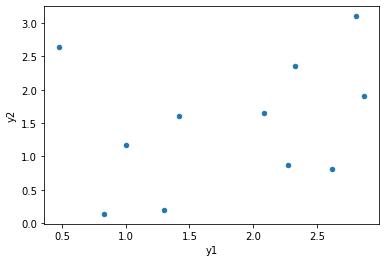

In [29]:
import matplotlib.pyplot as plt
X.data.plot(*X.vocs.objective_names, kind='scatter')

In [ ]:
# Cleanup
!rm -r temp